In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tested.csv to tested.csv


In [ ]:
import pandas as pd

df = pd.read_csv("tested.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info() #checking basic info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df['Survived'].value_counts()


,count
Survived,
0,266
1,152


In [ ]:
#data cleaning and processing
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
#typical fixing

In [ ]:
#encode categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [ ]:
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True, errors='ignore')
#dropping which isnt required

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']
#splitting features

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
#building adaboost model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier(max_depth=1)

adaboost = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
#prediction and evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = adaboost.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
adaboost_tuned = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

adaboost_tuned.fit(X_train, y_train)

y_pred2 = adaboost_tuned.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred2))


Tuned Accuracy: 1.0


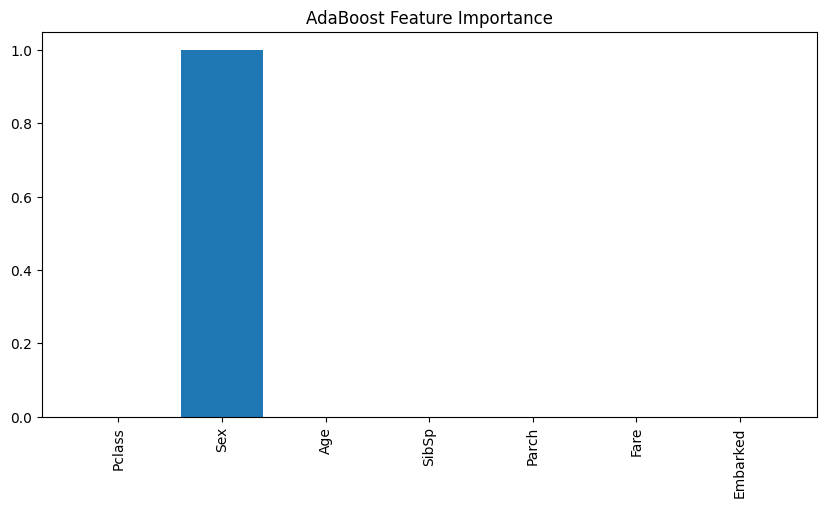

In [ ]:
import matplotlib.pyplot as plt

ada_importance = adaboost.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
plt.bar(features, ada_importance)
plt.xticks(rotation=90)
plt.title("AdaBoost Feature Importance")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 1.0


In [ ]:
ada_pred = adaboost.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))


AdaBoost Accuracy: 1.0


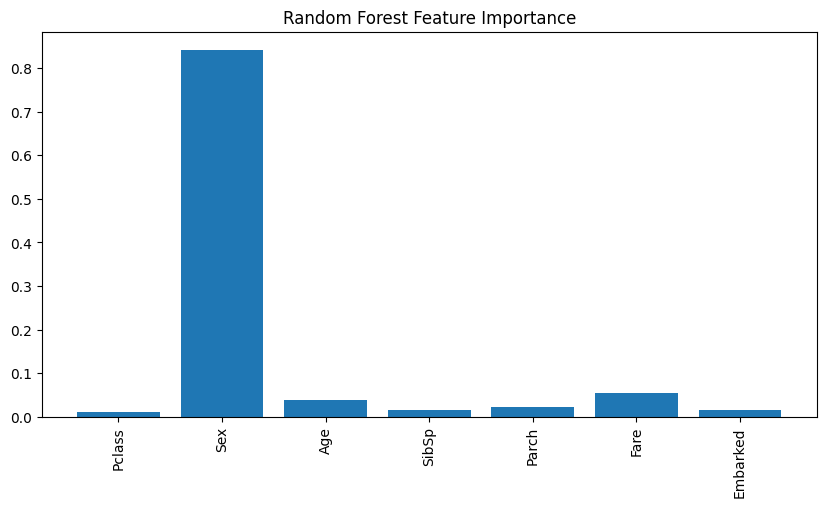

In [ ]:
rf_importance = rf.feature_importances_

plt.figure(figsize=(10,5))
plt.bar(features, rf_importance)
plt.xticks(rotation=90)
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
#using strong weak learners
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

base_model = DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=10
)

adaboost_improved = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

adaboost_improved.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    min_samples_leaf=10),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [ ]:
AdaBoostClassifier(
    estimator=base_model,
    n_estimators=150,
    learning_rate=0.3
)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    min_samples_leaf=10),
                   learning_rate=0.3, n_estimators=150)

In [ ]:
X['FamilySize'] = X['SibSp'] + X['Parch'] + 1


In [ ]:
X['IsAlone'] = (X['FamilySize'] == 1).astype(int)


In [ ]:
X = X.drop(['Embarked'], axis=1, errors='ignore')
#removing weak and redundant features

In [ ]:
# Drop feature
X = X.drop(['Embarked'], axis=1,errors='ignore')

# Re-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Retrain AdaBoost
adaboost_improved.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    min_samples_leaf=10),
                   learning_rate=0.5, n_estimators=100, random_state=42)

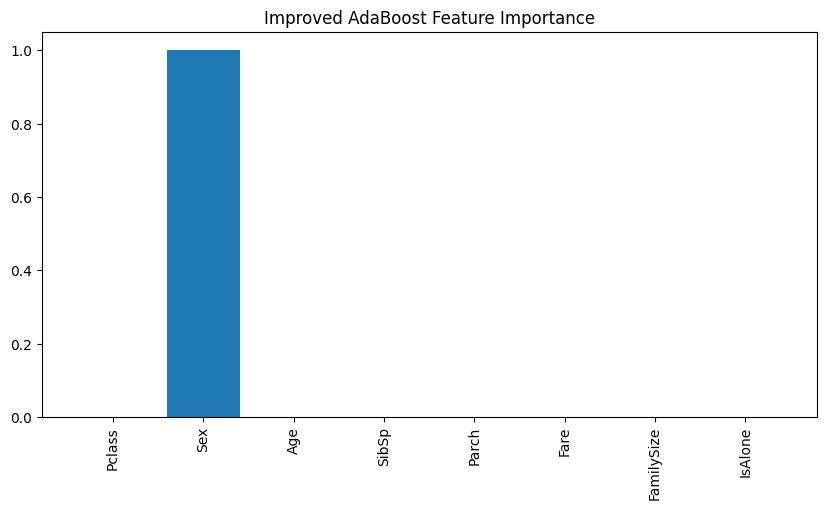

In [ ]:
feature_names = X_train.columns
imp = adaboost_improved.feature_importances_

plt.figure(figsize=(10,5))
plt.bar(feature_names, imp)
plt.xticks(rotation=90)
plt.title("Improved AdaBoost Feature Importance")
plt.show()


